# Simple usage of pytorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

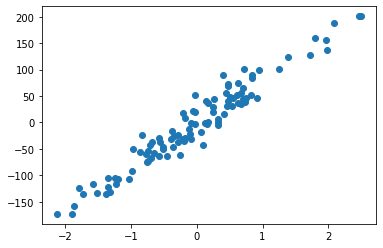

In [3]:
x, y = make_regression(n_features = 1, noise=20)
x = torch.tensor(x).float(); 
y = torch.tensor(y).float().reshape(-1, 1)
plt.scatter(x, y)

## Model on raw tensors 
To show flexibility and design of pytorch, we will explore how to build and train the model with just tensors that require grads (so that we can later differentiate our loss with respect to them). The class Regressor is here just for the readability of he code.

In [20]:
class Regressor(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.weights = torch.rand([n_features, 1], requires_grad=True)
        self.bias = torch.rand([1, 1], requires_grad=True)
        print("Weights created. Bias =", self.bias)
    
    def forward(self, x):
        x = x @ self.weights + self.bias
        return x

Weights created. Bias = tensor([[0.4064]], requires_grad=True)


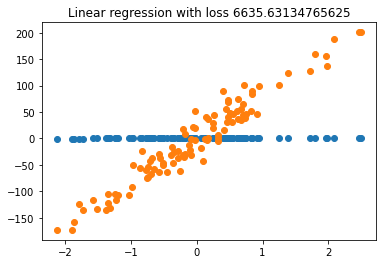

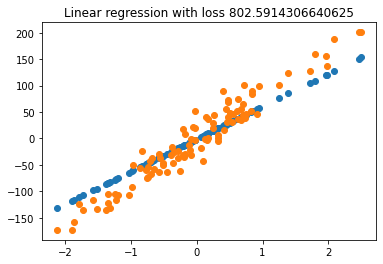

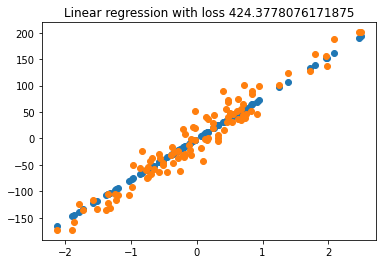

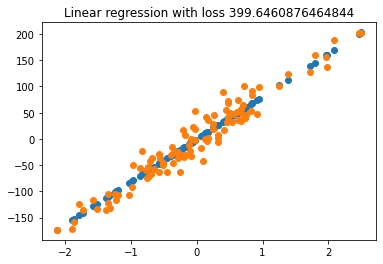

In [51]:
model = Regressor(1)

n_steps = 2000
lr = 1.5e-3
for i in range(n_steps):
    # Optimize
    y_pred = model(x)  # make prediction (forward computation)
    loss = torch.mean((y_pred - y)**2)  # compute loss
    loss.backward()  # compute derivatives of loss with respect to parameters that require grad
    with torch.no_grad():  # update parameters in the direction of negative gradient (no_grad context, because otherwise pytorch would track gradients)
        model.weights -= lr * model.weights.grad
        model.bias -= lr * model.bias.grad
    # Set gradients back to zero (otherwise they will accumulate - will be added together)
    model.weights.grad.data.zero_()
    model.bias.grad.data.zero_()
        
    # Plot 
    if i % 500 == 0:
        fig, ax = plt.subplots()
        ax.scatter(x, model(x).detach())
        ax.scatter(x, y)
        ax.set_title("Linear regression with loss {}".format(loss))
        plt.show()

## Model trained with optimizer
The above code could be written with the use of optimizer.

Weights created. Bias = tensor([[0.1506]], requires_grad=True)


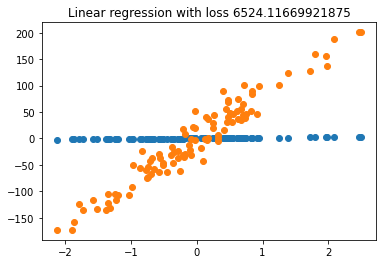

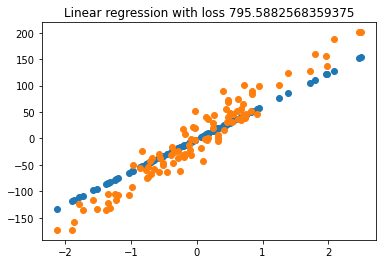

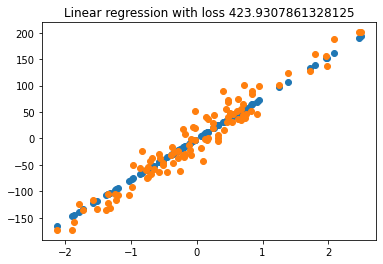

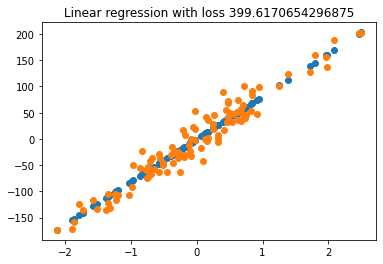

In [66]:
model = Regressor(1)
n_steps = 2000
lr = 1.5e-3
optimizer = optim.SGD((model.weights, model.bias), lr=lr)
for i in range(n_steps):
    # Optimize
    y_pred = model(x)  # make prediction (forward computation)
    loss = torch.mean((y_pred - y)**2)  # compute loss
    loss.backward()  # compute derivatives of loss with respect to parameters that require grad
    optimizer.step()  # update parameters in the direction of negative gradient
    optimizer.zero_grad()  # set gradients back to zero
        
    # Plot 
    if i % 500 == 0:
        fig, ax = plt.subplots()
        ax.scatter(x, model(x).detach())
        ax.scatter(x, y)
        ax.set_title("Linear regression with loss {}".format(loss))
        plt.show()